In [1]:
# to ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt 

In [3]:
ROOT_DIR = r"C:\Users\Sarthak Mahapatra\Documents\Refactored_Py_DS_ML_Bootcamp-master\Pnuemonia CNN project"
imgs = ['COVID','non-COVID']
NEW_DIR=r'C:\Users\Sarthak Mahapatra\Documents\Refactored_Py_DS_ML_Bootcamp-master\Pnuemonia CNN project\all_images/'


In [12]:
# Copy all my images to a new folder i.e NEW_DIR

if not os.path.exists(NEW_DIR):
  os.mkdir(NEW_DIR)

  for i in imgs:
    org_dir = os.path.join(ROOT_DIR, i+"/")
    
    for imgfile in glob.iglob(os.path.join(org_dir, "*.png")):
      shutil.copy(imgfile, NEW_DIR)
      
else:
  print("Already Exist")



```
# Now lets visualize the number of Images in each categories
```



In [10]:
counter = {'COVID':0,'non-COVID':0}

for image in imgs:
  for count in glob.iglob(NEW_DIR+image+"*"):
    counter[image] += 1

counter

{'COVID': 1252, 'non-COVID': 1229}

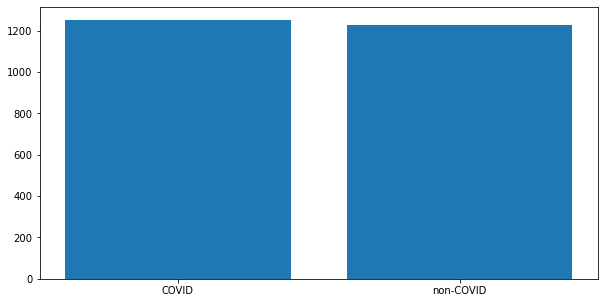

In [6]:
plt.figure(figsize=(10,5))
plt.bar(x = counter.keys(), height= counter.values())
plt.show()



```
# First off we need to give equal amount of data for every class. 
# we will be Dividing our data between Train, Test, Validation(C-1252,N-1229)

Train Data: 
        Normal : 983
        Covid: 1001


Test Data:
        Normal : 246
        Covid : 251
```



In [13]:
#Creating the folder

if not os.path.exists(NEW_DIR+"train_test_split/"):

  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/non-COVID")
  os.makedirs(NEW_DIR+"train_test_split/train/Covid")

  os.makedirs(NEW_DIR+"train_test_split/test/non-COVID")
  os.makedirs(NEW_DIR+"train_test_split/test/Covid")




  # Train Data
  for i in np.random.choice(replace= False , size= 1001 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 983 , a = glob.glob(NEW_DIR+'Non-Covid'+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/non-COVID" )
    os.remove(i)

# Test Data
  for i in np.random.choice(replace= False , size= 251 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 246 , a = glob.glob(NEW_DIR+'Non-Covid'+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/non-COVID" )
    os.remove(i)



In [3]:
train_path  = r"C:\Users\Sarthak Mahapatra\Documents\Refactored_Py_DS_ML_Bootcamp-master\Pnuemonia CNN project\all_images\train_test_split\train"
test_path = r"C:\Users\Sarthak Mahapatra\Documents\Refactored_Py_DS_ML_Bootcamp-master\Pnuemonia CNN project\all_images\train_test_split\test"

Preprocessing Image 

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D
from keras.models import Sequential
from keras.applications import vgg16
import keras

In [56]:
train_data_gen = ImageDataGenerator( preprocessing_function= vgg16.preprocess_input,zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2 , rescale= 1./255)
train = train_data_gen.flow_from_directory(directory= train_path , target_size=(224,224))

Found 1984 images belonging to 2 classes.


In [57]:
test_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input,rescale= 1./255 )
test = train_data_gen.flow_from_directory(directory= test_path , target_size=(224,224), shuffle= False)

Found 497 images belonging to 2 classes.


In [7]:
test.class_indices

{'Covid': 0, 'non-COVID': 1}

In [8]:
class_type = {0:'Covid',  1 : 'non-Covid'}

In [58]:
def plotImages(img_arr, label):

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(f'{im.shape} of {np.round(l)} image')
    plt.label=l
    plt.axis = False
    plt.show()

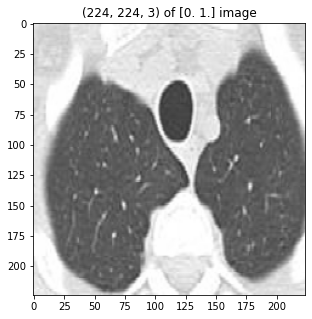

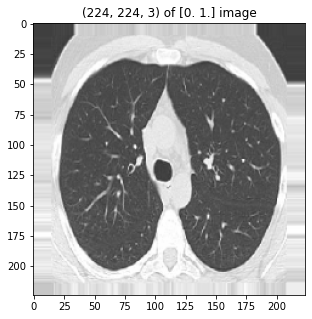

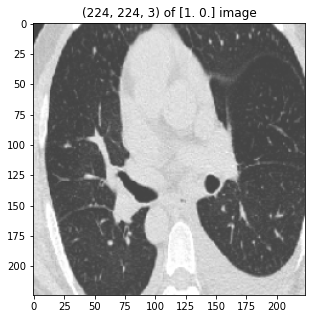

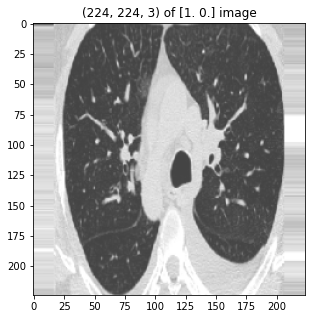

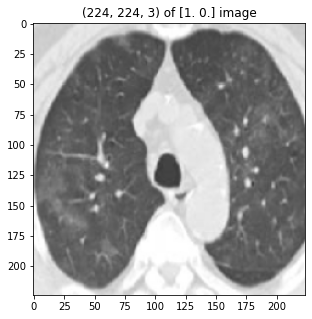

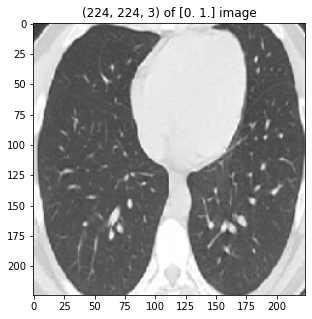

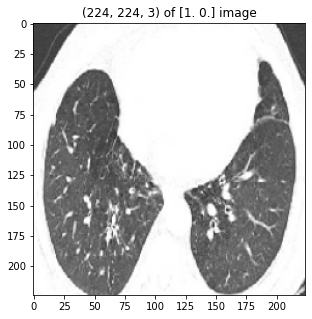

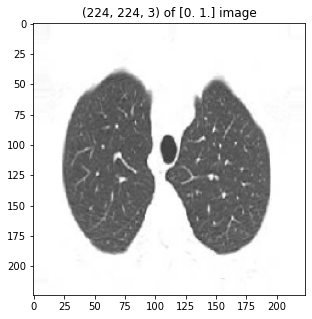

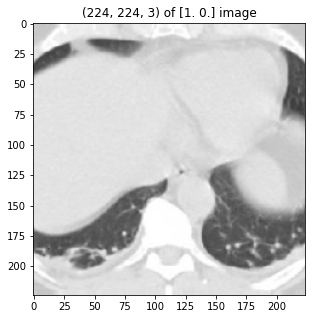

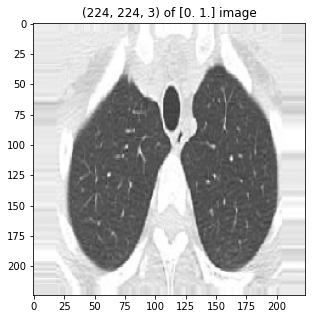

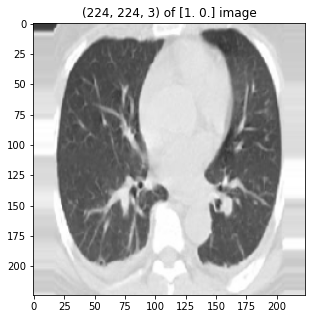

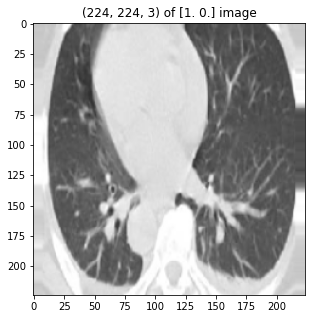

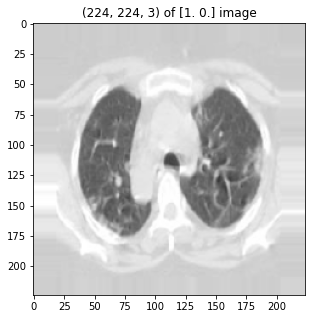

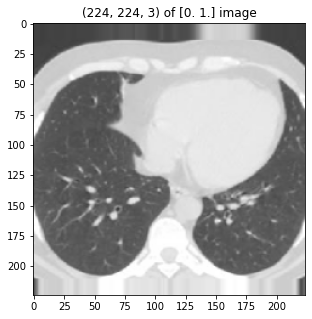

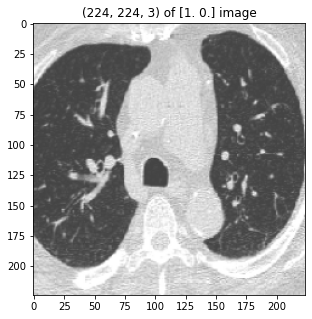

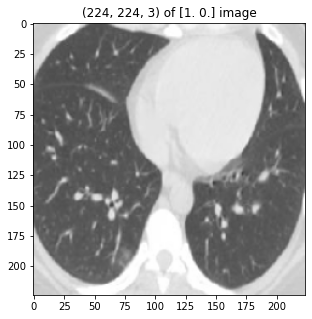

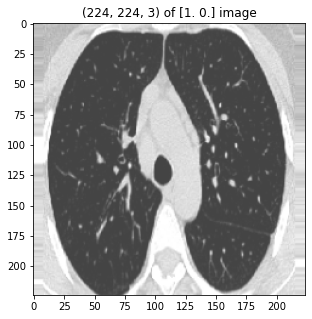

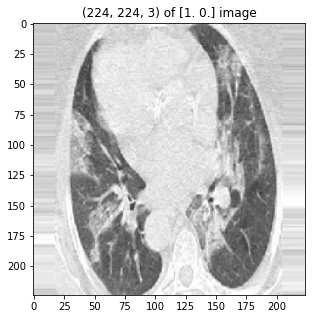

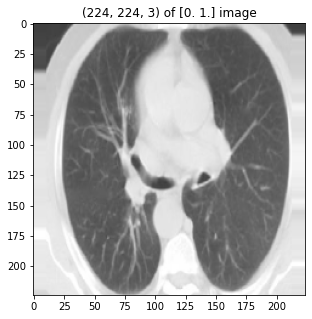

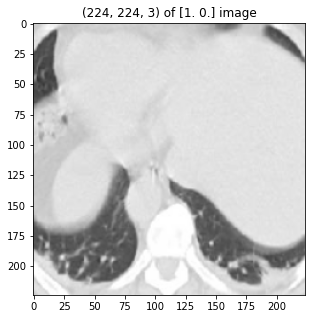

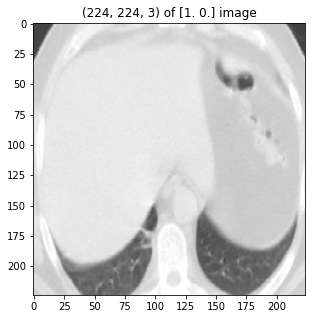

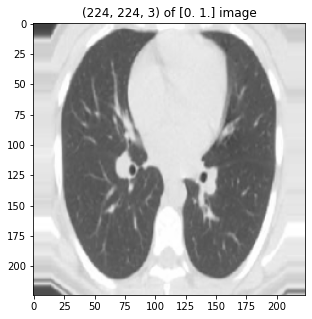

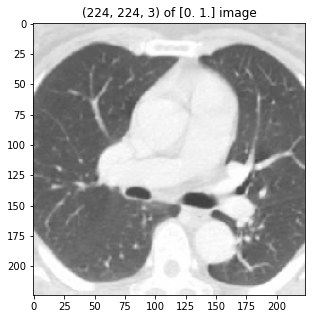

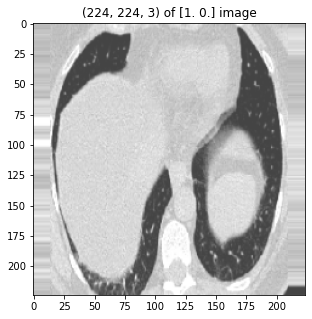

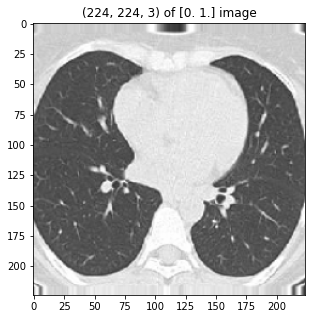

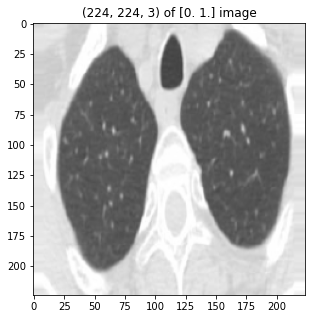

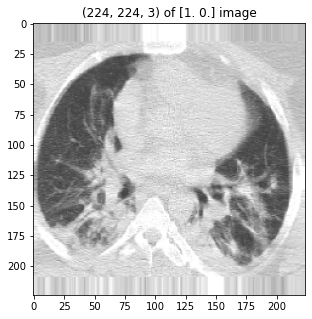

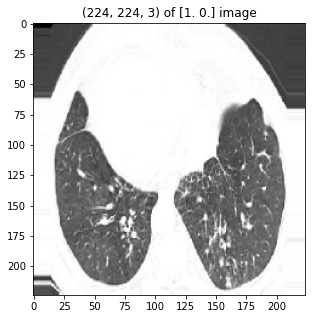

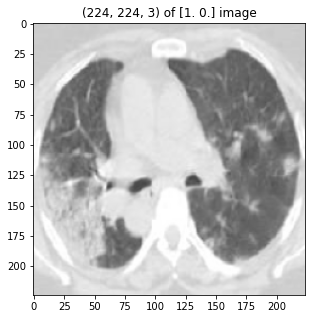

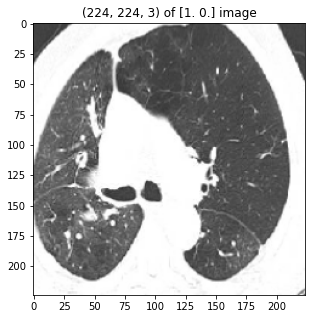

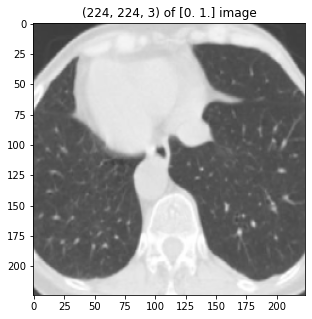

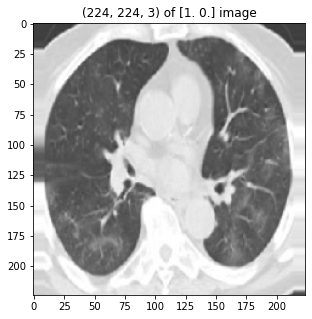

In [26]:
t_img , label = train.next()
plotImages(t_img, label)

Transfer Learning Using VGG16


# Model Arechitecture: VGG 16 

## VGG-16 is a convolution neural net (CNN ) architecture which was used to win ILSVR(Imagenet) competition in 2014. It is considered to be one of the excellent vision model architecture till date. ... It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture.

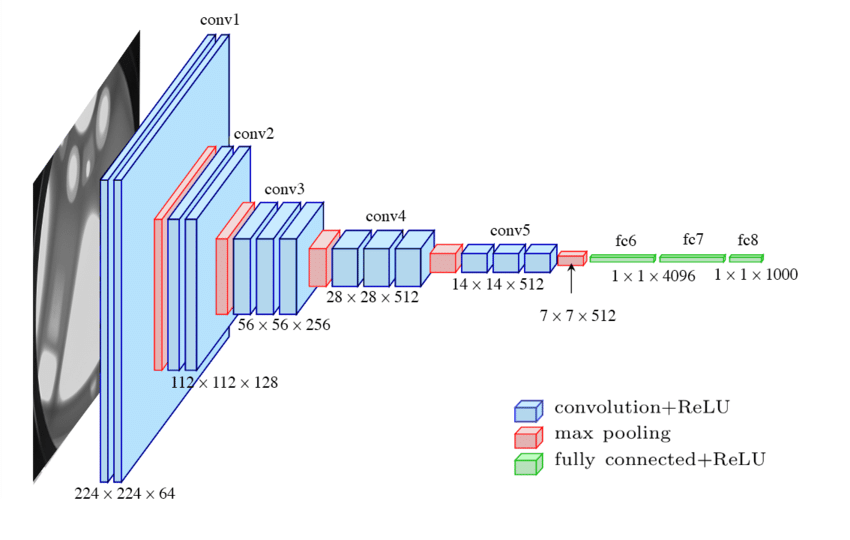

In [10]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [59]:
vgg = VGG16( input_shape=(224,224,3), include_top= False) # include_top will consider the new weights

In [60]:
for layer in vgg.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [61]:
x = Flatten()(vgg.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

model_vgg = Model(vgg.input, x)

In [62]:
model_vgg.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [63]:
model_vgg.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [64]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel_vgg.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [66]:
hist = model_vgg.fit_generator(train, steps_per_epoch= 10, epochs= 30, validation_data= test , validation_steps= 16, callbacks=[es,mc])

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.5986 - accuracy: 0.5063
Epoch 00001: val_accuracy improved from -inf to 0.62173, saving model to bestmodel_vgg.h5
10/10 [==============================] - 205s 22s/step - loss: 1.5986 - accuracy: 0.5063 - val_loss: 0.7706 - val_accuracy: 0.6217
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.5881 - accuracy: 0.6906
Epoch 00002: val_accuracy improved from 0.62173 to 0.76660, saving model to bestmodel_vgg.h5
10/10 [==============================] - 218s 23s/step - loss: 0.5881 - accuracy: 0.6906 - val_loss: 0.4672 - val_accuracy: 0.7666
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.4718 - accuracy: 0.7656
Epoch 00003: val_accuracy improved from 0.76660 to 0.81489, saving model to bestmodel_vgg.h5
10/10 [==============================] - 171s 18s/step - loss: 0.4718 - accuracy: 0.7656 - val_loss: 0.3918 - val_accuracy: 0.8149
Epoch 4/30
10/10 [==============================]

In [67]:
## load only the best model 
from keras.models import load_model
model_vgg = load_model("bestmodel_vgg.h5")

Model Performance Analysis

In [68]:
h = hist.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

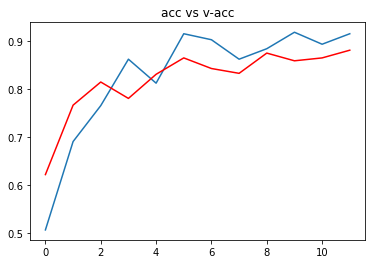

In [69]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

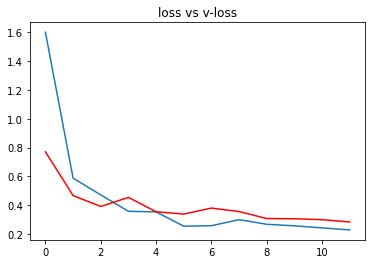

In [70]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()


In [71]:
acc = model_vgg.evaluate_generator(generator= test)[1] 

print(f"The accuracy of your model is = {acc*100} %")

The accuracy of your model is = 88.93359899520874 %


In [72]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img , axis= 0 )
  
  return img

The given X-Ray image is of type = Covid

The chances of image being Covid is : 91.23318195343018 percent

The chances of image being Normal is : 7.76214599609375 percent


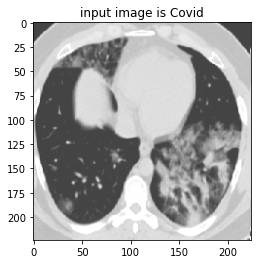

In [73]:
path = r"C:\Users\Sarthak Mahapatra\Documents\Refactored_Py_DS_ML_Bootcamp-master\Pnuemonia CNN project\all_images\train_test_split\test\Covid\Covid (36).png"
#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model_vgg.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model_vgg.predict(img)[0][1]*100} percent")

# to display the image  
plt.imshow(img[0], cmap = "gray")
plt.title(f"input image is {res}")
plt.show()